In [32]:
import os
import glob
import numpy as np
import cv2 as cv
import matplotlib.pyplot as plt
import seaborn as sns
from dotenv import load_dotenv
from PIL import Image

In [33]:
load_dotenv('test.env')
raw_dir = os.environ['RAW_DIR']

In [34]:
def medianmad_norm(arr_like):
    '''
    Normalize by median and MAD

    Modified version from the function made available by the professor
    '''
    np_arr = np.array(arr_like)
    median = np.median(np_arr)
    dev = np.abs(np_arr - median)
    mad = np.median(dev)
    norm = ((np_arr - median) / mad)
    return (norm,mad)

In [35]:
original_arr = np.random.randint(0, 100, 10)
norm_arr, mad = medianmad_norm(original_arr)
print(original_arr, norm_arr, mad)

[15 89 66  8  8 43 47 44 56 26] [-1.425  2.275  1.125 -1.775 -1.775 -0.025  0.175  0.025  0.625 -0.875] 20.0


In [36]:
test_path = os.path.join(raw_dir,'AVC/001_FLAIR01.bmp')
test_img  = cv.imread(test_path, cv.IMREAD_GRAYSCALE)
test_img.shape, test_img.dtype, test_img.max(), test_img.min()

((448, 448), dtype('uint8'), 254, 0)

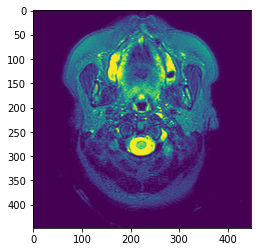

In [37]:
plt.imshow(test_img)

/home/felipe/miniconda3/envs/image/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:ylabel='Density'>

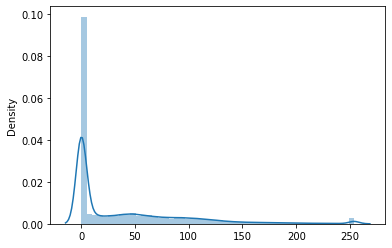

In [38]:
# nbins=20
# h, bin_edges = np.histogram(test_img, nbins)
# w=1./nbins
# bin_centers = bin_edges[1:]-(w/2)
# plt.title("Raw image histogram")
# plt.bar(bin_centers, h, width=w)
sns.distplot(test_img)


In [39]:
norm_img, mad = medianmad_norm(test_img)
norm_img.shape, norm_img.dtype, norm_img.max(), norm_img.min(), mad

((448, 448), dtype('float64'), 49.8, -1.0, 5.0)

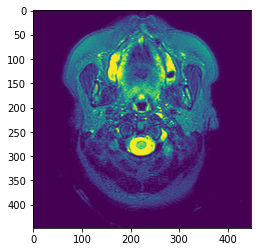

In [40]:
plt.imshow(test_img)

/home/felipe/miniconda3/envs/image/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:ylabel='Density'>

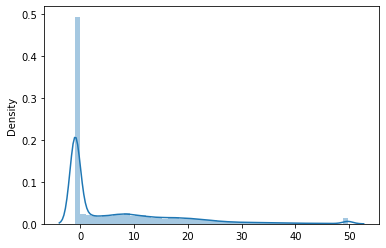

In [41]:
sns.distplot(norm_img)

In [42]:
mask_list = glob.glob(os.path.join(raw_dir,'AVC/*_mask.png')) + glob.glob(os.path.join(raw_dir,'EM/*_mask.png'))

In [43]:
for mask_path in mask_list:
    mask_arr = cv.imread(mask_path, cv.IMREAD_UNCHANGED)
    if mask_arr is not None:
        print(mask_path, np.count_nonzero(mask_arr), mask_arr.shape, mask_arr.dtype, mask_arr.max(), mask_arr.min())
    else:
        print(mask_path, 'invalid image')

/mnt/data/Personal/Dados/IA368X/P4/data/raw/AVC/051_FLAIR12_mask.png 262144 (512, 512) uint16 254 253
/mnt/data/Personal/Dados/IA368X/P4/data/raw/AVC/051_FLAIR13_mask.png 262144 (512, 512) uint16 254 253
/mnt/data/Personal/Dados/IA368X/P4/data/raw/AVC/051_FLAIR14_mask.png 262144 (512, 512) uint16 254 253
/mnt/data/Personal/Dados/IA368X/P4/data/raw/AVC/051_FLAIR15_mask.png 262144 (512, 512) uint16 254 253
/mnt/data/Personal/Dados/IA368X/P4/data/raw/AVC/051_FLAIR16_mask.png 262144 (512, 512) uint16 254 253
/mnt/data/Personal/Dados/IA368X/P4/data/raw/AVC/051_FLAIR17_mask.png 262144 (512, 512) uint16 254 253
/mnt/data/Personal/Dados/IA368X/P4/data/raw/AVC/051_FLAIR18_mask.png 262144 (512, 512) uint16 254 253
/mnt/data/Personal/Dados/IA368X/P4/data/raw/AVC/051_FLAIR19_mask.png 262144 (512, 512) uint16 254 253
/mnt/data/Personal/Dados/IA368X/P4/data/raw/AVC/051_FLAIR20_mask.png 262144 (512, 512) uint16 254 253
/mnt/data/Personal/Dados/IA368X/P4/data/raw/AVC/051_FLAIR21_mask.png 262144 (512, 

In [44]:
with Image.open(os.path.join(raw_dir, 'AVC/051_FLAIR12_mask.png')) as f:
    test_mask = np.array(f)

test_mask.shape, test_mask.max(), test_mask.min(), test_mask.dtype

((512, 512), 254, 253, dtype('int32'))

In [45]:
test_mask = cv.imread(os.path.join(raw_dir, 'AVC/051_FLAIR12_mask.png'), cv.IMREAD_UNCHANGED)
test_mask = test_mask == test_mask.max()
test_mask.shape, test_mask.max(), test_mask.min(), test_mask.dtype

((512, 512), True, False, dtype('bool'))

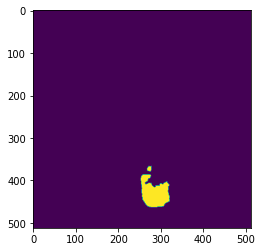

In [46]:
plt.imshow(test_mask)